### 0. lib and file load

In [97]:
# 기본
import pandas as pd
import numpy as np # 1.19.5
import os 

# for feature engineering
from datetime import datetime, date

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 정규화 
from sklearn.preprocessing import MinMaxScaler

In [98]:
# 파일을 불러오고 저장할 경로 설정

save_path = '/home/ubuntu2/workspace/JYK/kcit/data/preprocessed'

In [99]:
# 시각화 전 한글 깨짐 방지

plt.rcParams['font.family'] = 'NanumGothic'

In [100]:
# 전처리가 끝난 파일을 로드

df = pd.read_parquet(f'{save_path}/final_preprocessed_data.parquet')
df

유속(Cm/S)  수위(mm)  유량(M3/H)  위치  기온(°C)  1분 강수량(mm)  \
날짜 및 시간                                                                   
2022-06-08 16:10:00     0.296   0.147      12.0  10    23.9         0.0   
2022-06-08 16:00:00     0.280   0.154      12.0  10    23.1         0.0   
2022-06-08 15:50:00     0.324   0.149      14.0  10    23.2         0.0   
2022-06-08 15:40:00     0.206   0.143       8.0  10    23.0         0.0   
2022-06-08 15:30:00     0.250   0.134       9.0  10    22.9         0.0   
...                       ...     ...       ...  ..     ...         ...   
2019-01-01 00:40:00     1.600   0.700      64.0  19    -6.0         0.0   
2019-01-01 00:30:00     1.100   0.500      61.0  19    -6.0         0.0   
2019-01-01 00:20:00     1.300   0.300      62.0  19    -5.7         0.0   
2019-01-01 00:10:00     1.100   0.100      61.0  19    -5.5         0.0   
2019-01-01 00:00:00     0.800   0.000      58.0  19    -5.3         0.0   

                     강수유무(유무)  풍향(deg)  풍속(m/s)  
날짜 및 시간                                          
2022-06-08 16:10:00       0.0    121.4      0.4  
2022-06-08 16:00:00       0.0     35.7      1.4  
2022-06-08 15:50:00       0.0     93.2      1.3  
2022-06-08 15:40:00       0.0     52.6      1.2  
2022-06-08 15:30:00       0.0     35.6      1.4  
...                       ...      ...      ...  
2019-01-01 00:40:00       0.0     36.1      0.0  
2019-01-01 00:30:00       0.0    283.8      0.0  
2019-01-01 00:20:00       0.0     76.7      0.7  
2019-01-01 00:10:00       0.0     90.1      0.0  
2019-01-01 00:00:00       0.0     88.0      0.5  

[559362 rows x 9 columns]

### 1. feature engineering

In [101]:
df_f = df.copy()

<AxesSubplot: xlabel='날짜 및 시간'>

/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/home/ubuntu2/anaconda3/envs/kcit-ext/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


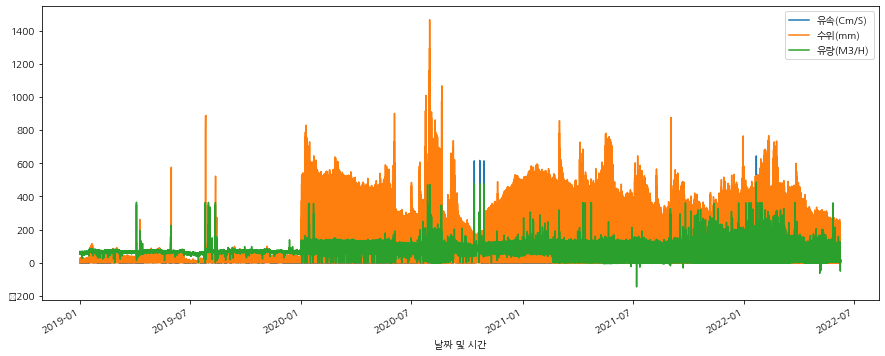

In [102]:
# 시각화를 통해 변수의 대략적인 분포를 확인

df_f[['유속(Cm/S)', '수위(mm)', '유량(M3/H)']].plot(kind='line', figsize=(15, 6))

### 2. data split 

지역별로 별개의 dataset를 만들어주는 방안을 강구 중

In [103]:
# 가장 데이터가 많은 지역을 추출 

df_19 = df_f[df_f['위치'] == 19]

In [104]:
# 전체 데이터에서 최신 날짜와 가장 오래된 날짜를 확인 

df_f_19 = df_19.copy().reset_index()
print('가장 오래된 값:', df_f_19['날짜 및 시간'].min())
print('최신값:', df_f_19['날짜 및 시간'].max())
print('전체 측정 일수:', df_f_19['날짜 및 시간'].max() - df_f_19['날짜 및 시간'].min())

가장 오래된 값: 2019-01-01 00:00:00
최신값: 2022-04-30 23:50:00
전체 측정 일수: 1215 days 23:50:00


In [105]:
# 데이터 세트 분리를 위해 날짜 지정 및 연산 

val_start = '2022-01-01 00:00:00'
test_start = '2022-02-01 00:00:00'

# 7:2:1에 근접한 비율로 추출

train = df_19[df_19.index < val_start] # val보다 큰 경우
valid = df_19[(df_19.index >= val_start) & (df_19.index < test_start)]
test = df_19[df_19.index >= test_start] # test보다 작은 경우

# 확인
train.shape, test.shape, valid.shape

((157682, 9), (12808, 9), (4461, 9))

In [106]:
# 20190101 - 20211231 (23개월)
train

유속(Cm/S)  수위(mm)  유량(M3/H)  위치  기온(°C)  1분 강수량(mm)  \
날짜 및 시간                                                                   
2021-12-31 23:50:00      71.2   483.7     185.0  19    -9.6         0.0   
2021-12-31 23:40:00      38.7   475.3     147.0  19    -9.5         0.0   
2021-12-31 23:30:00      36.5   468.9     144.0  19    -9.4         0.0   
2021-12-31 23:20:00      61.7   462.4     175.0  19    -9.3         0.0   
2021-12-31 23:10:00      38.7   455.2     147.0  19    -8.6         0.0   
...                       ...     ...       ...  ..     ...         ...   
2019-01-01 00:40:00       1.6     0.7      64.0  19    -6.0         0.0   
2019-01-01 00:30:00       1.1     0.5      61.0  19    -6.0         0.0   
2019-01-01 00:20:00       1.3     0.3      62.0  19    -5.7         0.0   
2019-01-01 00:10:00       1.1     0.1      61.0  19    -5.5         0.0   
2019-01-01 00:00:00       0.8     0.0      58.0  19    -5.3         0.0   

                     강수유무(유무)  풍향(deg)  풍속(m/s)  
날짜 및 시간                                          
2021-12-31 23:50:00       0.0    142.8      0.8  
2021-12-31 23:40:00       0.0    133.2      0.9  
2021-12-31 23:30:00       0.0    121.0      0.7  
2021-12-31 23:20:00       0.0    139.6      0.9  
2021-12-31 23:10:00       0.0    184.7      0.9  
...                       ...      ...      ...  
2019-01-01 00:40:00       0.0     36.1      0.0  
2019-01-01 00:30:00       0.0    283.8      0.0  
2019-01-01 00:20:00       0.0     76.7      0.7  
2019-01-01 00:10:00       0.0     90.1      0.0  
2019-01-01 00:00:00       0.0     88.0      0.5  

[157682 rows x 9 columns]

In [107]:
# 20220201 - 20220430(2개월)

test

유속(Cm/S)  수위(mm)  유량(M3/H)  위치  기온(°C)  1분 강수량(mm)  \
날짜 및 시간                                                                   
2022-04-30 23:50:00       1.3    27.5      62.0  19    10.6         0.0   
2022-04-30 23:40:00       1.0    27.3      60.0  19    10.4         0.0   
2022-04-30 23:30:00       0.5    27.1      56.0  19    10.7         0.0   
2022-04-30 23:20:00       1.1    26.9      61.0  19    10.8         0.0   
2022-04-30 23:10:00       0.7    26.7      57.0  19    10.8         0.0   
...                       ...     ...       ...  ..     ...         ...   
2022-02-01 00:40:00      52.1    30.4     164.0  19     1.3         0.0   
2022-02-01 00:30:00      38.7    22.1     147.0  19     1.1         0.0   
2022-02-01 00:20:00      55.5    15.4     168.0  19     1.1         0.0   
2022-02-01 00:10:00      49.5     7.8     161.0  19     0.9         0.0   
2022-02-01 00:00:00      47.1     0.0     158.0  19     0.5         0.0   

                     강수유무(유무)  풍향(deg)  풍속(m/s)  
날짜 및 시간                                          
2022-04-30 23:50:00       0.0    257.7      1.3  
2022-04-30 23:40:00       0.0    246.3      1.2  
2022-04-30 23:30:00       0.0    252.1      0.4  
2022-04-30 23:20:00       0.0    250.4      1.5  
2022-04-30 23:10:00       0.0    249.9      1.2  
...                       ...      ...      ...  
2022-02-01 00:40:00       0.0    317.1      1.4  
2022-02-01 00:30:00       0.0    288.4      1.0  
2022-02-01 00:20:00       0.0    314.2      1.0  
2022-02-01 00:10:00       0.0    312.7      1.3  
2022-02-01 00:00:00       0.0    294.1      2.5  

[12808 rows x 9 columns]

In [108]:
# 20220101-20220131(1개월)

valid

유속(Cm/S)  수위(mm)  유량(M3/H)  위치  기온(°C)  1분 강수량(mm)  \
날짜 및 시간                                                                   
2022-01-31 23:50:00      34.4   560.7     141.0  19     0.4         0.0   
2022-01-31 23:40:00      23.1   553.9     123.0  19     0.5         0.0   
2022-01-31 23:30:00      42.4   545.7     152.0  19     0.0         0.0   
2022-01-31 23:20:00      51.2   537.4     163.0  19     0.0         0.0   
2022-01-31 23:10:00      58.1   529.4     171.0  19    -0.1         0.0   
...                       ...     ...       ...  ..     ...         ...   
2022-01-01 00:40:00      66.4    30.5     180.0  19   -10.0         0.0   
2022-01-01 00:30:00      26.6    22.1     129.0  19    -9.9         0.0   
2022-01-01 00:20:00      35.8    14.6     143.0  19    -9.8         0.0   
2022-01-01 00:10:00      47.9     6.8     159.0  19    -9.7         0.0   
2022-01-01 00:00:00      34.4     0.0     141.0  19    -9.6         0.0   

                     강수유무(유무)  풍향(deg)  풍속(m/s)  
날짜 및 시간                                          
2022-01-31 23:50:00       0.0    332.7      0.6  
2022-01-31 23:40:00      10.0    232.8      2.2  
2022-01-31 23:30:00      10.0    192.0      0.8  
2022-01-31 23:20:00      10.0    210.3      0.5  
2022-01-31 23:10:00      10.0    181.1      1.3  
...                       ...      ...      ...  
2022-01-01 00:40:00       0.0    115.5      0.6  
2022-01-01 00:30:00       0.0    127.6      0.6  
2022-01-01 00:20:00       0.0    134.1      0.8  
2022-01-01 00:10:00       0.0    119.5      0.8  
2022-01-01 00:00:00       0.0    144.5      0.7  

[4461 rows x 9 columns]

#### ARIMA 외의 모델은 다른 변수가 필요함

In [109]:
# 2019년 12월 31일까지의 수치와 이후의 수치 간 차이에 주목하여 해당 구간을 절삭하기로 결정

start = '2020-01-01 00:00:00'
df_19 = df_19[df_19.index >= start] 
df_19

유속(Cm/S)  수위(mm)  유량(M3/H)  위치  기온(°C)  1분 강수량(mm)  \
날짜 및 시간                                                                   
2022-04-30 23:50:00       1.3    27.5      62.0  19    10.6         0.0   
2022-04-30 23:40:00       1.0    27.3      60.0  19    10.4         0.0   
2022-04-30 23:30:00       0.5    27.1      56.0  19    10.7         0.0   
2022-04-30 23:20:00       1.1    26.9      61.0  19    10.8         0.0   
2022-04-30 23:10:00       0.7    26.7      57.0  19    10.8         0.0   
...                       ...     ...       ...  ..     ...         ...   
2020-01-01 00:40:00       1.9     1.1      66.0  19    -6.5         0.0   
2020-01-01 00:30:00       1.7     0.8      65.0  19    -6.5         0.0   
2020-01-01 00:20:00       1.1     0.5      61.0  19    -6.8         0.0   
2020-01-01 00:10:00       1.7     0.2      65.0  19    -6.8         0.0   
2020-01-01 00:00:00       1.3     0.0      62.0  19    -7.0         0.0   

                     강수유무(유무)  풍향(deg)  풍속(m/s)  
날짜 및 시간                                          
2022-04-30 23:50:00       0.0    257.7      1.3  
2022-04-30 23:40:00       0.0    246.3      1.2  
2022-04-30 23:30:00       0.0    252.1      0.4  
2022-04-30 23:20:00       0.0    250.4      1.5  
2022-04-30 23:10:00       0.0    249.9      1.2  
...                       ...      ...      ...  
2020-01-01 00:40:00       0.0    182.7      1.1  
2020-01-01 00:30:00       0.0    153.3      0.0  
2020-01-01 00:20:00       0.0    204.2      0.6  
2020-01-01 00:10:00       0.0    209.6      1.3  
2020-01-01 00:00:00       0.0    147.3      0.1  

[122476 rows x 9 columns]

In [110]:
# 위치 컬럼을 더미화 

df_f['위치'].replace({1:'용인01', 3:'용인03', 5:'용인05', 10:'용인14', 
                    16:'오포09', 17:'오포12', 19:'오포17', 21:'동부05'}, 
                   inplace=True)
df_f = pd.get_dummies(df_f, columns=['위치'])
df_f

유속(Cm/S)  수위(mm)  유량(M3/H)  기온(°C)  1분 강수량(mm)  강수유무(유무)  \
날짜 및 시간                                                                         
2022-06-08 16:10:00     0.296   0.147      12.0    23.9         0.0       0.0   
2022-06-08 16:00:00     0.280   0.154      12.0    23.1         0.0       0.0   
2022-06-08 15:50:00     0.324   0.149      14.0    23.2         0.0       0.0   
2022-06-08 15:40:00     0.206   0.143       8.0    23.0         0.0       0.0   
2022-06-08 15:30:00     0.250   0.134       9.0    22.9         0.0       0.0   
...                       ...     ...       ...     ...         ...       ...   
2019-01-01 00:40:00     1.600   0.700      64.0    -6.0         0.0       0.0   
2019-01-01 00:30:00     1.100   0.500      61.0    -6.0         0.0       0.0   
2019-01-01 00:20:00     1.300   0.300      62.0    -5.7         0.0       0.0   
2019-01-01 00:10:00     1.100   0.100      61.0    -5.5         0.0       0.0   
2019-01-01 00:00:00     0.800   0.000      58.0    -5.3         0.0       0.0   

                     풍향(deg)  풍속(m/s)  위치_동부05  위치_오포09  위치_오포12  위치_오포17  \
날짜 및 시간                                                                     
2022-06-08 16:10:00    121.4      0.4        0        0        0        0   
2022-06-08 16:00:00     35.7      1.4        0        0        0        0   
2022-06-08 15:50:00     93.2      1.3        0        0        0        0   
2022-06-08 15:40:00     52.6      1.2        0        0        0        0   
2022-06-08 15:30:00     35.6      1.4        0        0        0        0   
...                      ...      ...      ...      ...      ...      ...   
2019-01-01 00:40:00     36.1      0.0        0        0        0        1   
2019-01-01 00:30:00    283.8      0.0        0        0        0        1   
2019-01-01 00:20:00     76.7      0.7        0        0        0        1   
2019-01-01 00:10:00     90.1      0.0        0        0        0        1   
2019-01-01 00:00:00     88.0      0.5        0        0        0        1   

                     위치_용인01  위치_용인03  위치_용인05  위치_용인14  
날짜 및 시간                                                  
2022-06-08 16:10:00        0        0        0        1  
2022-06-08 16:00:00        0        0        0        1  
2022-06-08 15:50:00        0        0        0        1  
2022-06-08 15:40:00        0        0        0        1  
2022-06-08 15:30:00        0        0        0        1  
...                      ...      ...      ...      ...  
2019-01-01 00:40:00        0        0        0        0  
2019-01-01 00:30:00        0        0        0        0  
2019-01-01 00:20:00        0        0        0        0  
2019-01-01 00:10:00        0        0        0        0  
2019-01-01 00:00:00        0        0        0        0  

[559362 rows x 16 columns]

In [111]:
# 강수 유무의 결측치를 강수 없음(0)으로 변환하고 컬럼을 더미화

df_f['강수유무(유무)'] = df_f['강수유무(유무)'].fillna('N')
df_f['강수유무(유무)'].replace({0:'N', 10.0:'Y'}, inplace=True)
df_f = pd.get_dummies(df_f)
df_f

유속(Cm/S)  수위(mm)  유량(M3/H)  기온(°C)  1분 강수량(mm)  풍향(deg)  \
날짜 및 시간                                                                        
2022-06-08 16:10:00     0.296   0.147      12.0    23.9         0.0    121.4   
2022-06-08 16:00:00     0.280   0.154      12.0    23.1         0.0     35.7   
2022-06-08 15:50:00     0.324   0.149      14.0    23.2         0.0     93.2   
2022-06-08 15:40:00     0.206   0.143       8.0    23.0         0.0     52.6   
2022-06-08 15:30:00     0.250   0.134       9.0    22.9         0.0     35.6   
...                       ...     ...       ...     ...         ...      ...   
2019-01-01 00:40:00     1.600   0.700      64.0    -6.0         0.0     36.1   
2019-01-01 00:30:00     1.100   0.500      61.0    -6.0         0.0    283.8   
2019-01-01 00:20:00     1.300   0.300      62.0    -5.7         0.0     76.7   
2019-01-01 00:10:00     1.100   0.100      61.0    -5.5         0.0     90.1   
2019-01-01 00:00:00     0.800   0.000      58.0    -5.3         0.0     88.0   

                     풍속(m/s)  위치_동부05  위치_오포09  위치_오포12  위치_오포17  위치_용인01  \
날짜 및 시간                                                                     
2022-06-08 16:10:00      0.4        0        0        0        0        0   
2022-06-08 16:00:00      1.4        0        0        0        0        0   
2022-06-08 15:50:00      1.3        0        0        0        0        0   
2022-06-08 15:40:00      1.2        0        0        0        0        0   
2022-06-08 15:30:00      1.4        0        0        0        0        0   
...                      ...      ...      ...      ...      ...      ...   
2019-01-01 00:40:00      0.0        0        0        0        1        0   
2019-01-01 00:30:00      0.0        0        0        0        1        0   
2019-01-01 00:20:00      0.7        0        0        0        1        0   
2019-01-01 00:10:00      0.0        0        0        0        1        0   
2019-01-01 00:00:00      0.5        0        0        0        1        0   

                     위치_용인03  위치_용인05  위치_용인14  강수유무(유무)_N  강수유무(유무)_Y  
날짜 및 시간                                                                 
2022-06-08 16:10:00        0        0        1           1           0  
2022-06-08 16:00:00        0        0        1           1           0  
2022-06-08 15:50:00        0        0        1           1           0  
2022-06-08 15:40:00        0        0        1           1           0  
2022-06-08 15:30:00        0        0        1           1           0  
...                      ...      ...      ...         ...         ...  
2019-01-01 00:40:00        0        0        0           1           0  
2019-01-01 00:30:00        0        0        0           1           0  
2019-01-01 00:20:00        0        0        0           1           0  
2019-01-01 00:10:00        0        0        0           1           0  
2019-01-01 00:00:00        0        0        0           1           0  

[559362 rows x 17 columns]

In [112]:
# datetime index로부터 날짜, 요일 데이터 추출 

df_f = df_f.reset_index()
df_f['연'] = df_f['날짜 및 시간'].dt.year
df_f['월'] = df_f['날짜 및 시간'].dt.month 
df_f['일'] = df_f['날짜 및 시간'].dt.day
df_f['요일'] = df_f['날짜 및 시간'].dt.dayofweek

df_f['시'] = df_f['날짜 및 시간'].dt.hour
df_f['분'] = df_f['날짜 및 시간'].dt.minute

df_f

날짜 및 시간  유속(Cm/S)  수위(mm)  유량(M3/H)  기온(°C)  1분 강수량(mm)  \
0      2022-06-08 16:10:00     0.296   0.147      12.0    23.9         0.0   
1      2022-06-08 16:00:00     0.280   0.154      12.0    23.1         0.0   
2      2022-06-08 15:50:00     0.324   0.149      14.0    23.2         0.0   
3      2022-06-08 15:40:00     0.206   0.143       8.0    23.0         0.0   
4      2022-06-08 15:30:00     0.250   0.134       9.0    22.9         0.0   
...                    ...       ...     ...       ...     ...         ...   
559357 2019-01-01 00:40:00     1.600   0.700      64.0    -6.0         0.0   
559358 2019-01-01 00:30:00     1.100   0.500      61.0    -6.0         0.0   
559359 2019-01-01 00:20:00     1.300   0.300      62.0    -5.7         0.0   
559360 2019-01-01 00:10:00     1.100   0.100      61.0    -5.5         0.0   
559361 2019-01-01 00:00:00     0.800   0.000      58.0    -5.3         0.0   

        풍향(deg)  풍속(m/s)  위치_동부05  위치_오포09  ...  위치_용인05  위치_용인14  강수유무(유무)_N  \
0         121.4      0.4        0        0  ...        0        1           1   
1          35.7      1.4        0        0  ...        0        1           1   
2          93.2      1.3        0        0  ...        0        1           1   
3          52.6      1.2        0        0  ...        0        1           1   
4          35.6      1.4        0        0  ...        0        1           1   
...         ...      ...      ...      ...  ...      ...      ...         ...   
559357     36.1      0.0        0        0  ...        0        0           1   
559358    283.8      0.0        0        0  ...        0        0           1   
559359     76.7      0.7        0        0  ...        0        0           1   
559360     90.1      0.0        0        0  ...        0        0           1   
559361     88.0      0.5        0        0  ...        0        0           1   

        강수유무(유무)_Y     연  월  일  요일   시   분  
0                0  2022  6  8   2  16  10  
1                0  2022  6  8   2  16   0  
2                0  2022  6  8   2  15  50  
3                0  2022  6  8   2  15  40  
4                0  2022  6  8   2  15  30  
...            ...   ... .. ..  ..  ..  ..  
559357           0  2019  1  1   1   0  40  
559358           0  2019  1  1   1   0  30  
559359           0  2019  1  1   1   0  20  
559360           0  2019  1  1   1   0  10  
559361           0  2019  1  1   1   0   0  

[559362 rows x 24 columns]

In [113]:
# 결측값을 보간

df_f = df_f.set_index('날짜 및 시간')
df_f.interpolate(method='values', inplace=True)

##### 번외: lagtime 생성

In [114]:
# target을 10분, 1시간, 6시간, 12시간, 24시간 단위로 예측할 수 있도록 지연(lag) 컬럼 생성

df_f['수위(mm)_lag_10m'] = df_f['수위(mm)'].shift(-1)
df_f['수위(mm)_lag_30m'] = df_f['수위(mm)'].shift(-3)
df_f['수위(mm)_lag_1h'] = df_f['수위(mm)'].shift(-6)
df_f['수위(mm)_lag_6h'] = df_f['수위(mm)'].shift(-36)
df_f['수위(mm)_lag_12h'] = df_f['수위(mm)'].shift(-72)
df_f['수위(mm)_lag_24h'] = df_f['수위(mm)'].shift(-144)

In [115]:
df_f.dropna(inplace=True)
df_f

유속(Cm/S)  수위(mm)  유량(M3/H)  기온(°C)  1분 강수량(mm)  풍향(deg)  \
날짜 및 시간                                                                        
2022-06-08 16:10:00     0.296   0.147      12.0    23.9         0.0    121.4   
2022-06-08 16:00:00     0.280   0.154      12.0    23.1         0.0     35.7   
2022-06-08 15:50:00     0.324   0.149      14.0    23.2         0.0     93.2   
2022-06-08 15:40:00     0.206   0.143       8.0    23.0         0.0     52.6   
2022-06-08 15:30:00     0.250   0.134       9.0    22.9         0.0     35.6   
...                       ...     ...       ...     ...         ...      ...   
2019-01-02 00:40:00     1.400   0.800      63.0    -6.8         0.0    125.5   
2019-01-02 00:30:00     1.400   0.600      63.0    -5.7         0.0    283.7   
2019-01-02 00:20:00     1.400   0.400      63.0    -5.3         0.0    300.0   
2019-01-02 00:10:00     1.400   0.200      63.0    -5.2         0.0    326.8   
2019-01-02 00:00:00     1.400   0.000      63.0    -4.7         0.0    326.0   

                     풍속(m/s)  위치_동부05  위치_오포09  위치_오포12  ...  일  요일   시   분  \
날짜 및 시간                                                  ...                  
2022-06-08 16:10:00      0.4        0        0        0  ...  8   2  16  10   
2022-06-08 16:00:00      1.4        0        0        0  ...  8   2  16   0   
2022-06-08 15:50:00      1.3        0        0        0  ...  8   2  15  50   
2022-06-08 15:40:00      1.2        0        0        0  ...  8   2  15  40   
2022-06-08 15:30:00      1.4        0        0        0  ...  8   2  15  30   
...                      ...      ...      ...      ...  ... ..  ..  ..  ..   
2019-01-02 00:40:00      1.1        0        0        0  ...  2   2   0  40   
2019-01-02 00:30:00      0.8        0        0        0  ...  2   2   0  30   
2019-01-02 00:20:00      0.5        0        0        0  ...  2   2   0  20   
2019-01-02 00:10:00      1.1        0        0        0  ...  2   2   0  10   
2019-01-02 00:00:00      1.0        0        0        0  ...  2   2   0   0   

                     수위(mm)_lag_10m  수위(mm)_lag_30m  수위(mm)_lag_1h  \
날짜 및 시간                                                              
2022-06-08 16:10:00           0.154           0.143          0.136   
2022-06-08 16:00:00           0.149           0.134          0.136   
2022-06-08 15:50:00           0.143           0.134          0.125   
2022-06-08 15:40:00           0.134           0.136          0.134   
2022-06-08 15:30:00           0.134           0.136          0.119   
...                             ...             ...            ...   
2019-01-02 00:40:00           0.600           0.200         29.900   
2019-01-02 00:30:00           0.400           0.000         29.600   
2019-01-02 00:20:00           0.200          30.200         29.400   
2019-01-02 00:10:00           0.000          29.900         29.100   
2019-01-02 00:00:00          30.200          29.600         28.900   

                     수위(mm)_lag_6h  수위(mm)_lag_12h  수위(mm)_lag_24h  
날짜 및 시간                                                             
2022-06-08 16:10:00          0.141           0.142           0.089  
2022-06-08 16:00:00          0.144           0.148           0.151  
2022-06-08 15:50:00          0.143           0.155           0.148  
2022-06-08 15:40:00          0.154           0.144           0.084  
2022-06-08 15:30:00          0.150           0.144           0.084  
...                            ...             ...             ...  
2019-01-02 00:40:00         24.200          17.600           0.700  
2019-01-02 00:30:00         24.000          17.500           0.500  
2019-01-02 00:20:00         23.800          17.400           0.300  
2019-01-02 00:10:00         23.600          17.200           0.100  
2019-01-02 00:00:00         23.400          17.100           0.000  

[559218 rows x 29 columns]

In [116]:
def generate_cyclical_features(df, col_name, period, start_num=0):
    kwargs = {
        f'sin_{col_name}': lambda x: np.sin(2 * np.pi * (df[col_name] - start_num) / period),
        f'cos_{col_name}': lambda x: np.cos(2 * np.pi * (df[col_name] - start_num) / period)}
    return df.assign(**kwargs).drop(columns=[col_name])

df_f = generate_cyclical_features(df_f, '월', 12, 1)
df_f = generate_cyclical_features(df_f, '일', 30, 1)
df_f = generate_cyclical_features(df_f, '시', 24, 0)
df_f = generate_cyclical_features(df_f, '요일', 7, 0)
df_f = generate_cyclical_features(df_f, '풍향(deg)', 36, 0)

df_f

유속(Cm/S)  수위(mm)  유량(M3/H)  기온(°C)  1분 강수량(mm)  풍속(m/s)  \
날짜 및 시간                                                                        
2022-06-08 16:10:00     0.296   0.147      12.0    23.9         0.0      0.4   
2022-06-08 16:00:00     0.280   0.154      12.0    23.1         0.0      1.4   
2022-06-08 15:50:00     0.324   0.149      14.0    23.2         0.0      1.3   
2022-06-08 15:40:00     0.206   0.143       8.0    23.0         0.0      1.2   
2022-06-08 15:30:00     0.250   0.134       9.0    22.9         0.0      1.4   
...                       ...     ...       ...     ...         ...      ...   
2019-01-02 00:40:00     1.400   0.800      63.0    -6.8         0.0      1.1   
2019-01-02 00:30:00     1.400   0.600      63.0    -5.7         0.0      0.8   
2019-01-02 00:20:00     1.400   0.400      63.0    -5.3         0.0      0.5   
2019-01-02 00:10:00     1.400   0.200      63.0    -5.2         0.0      1.1   
2019-01-02 00:00:00     1.400   0.000      63.0    -4.7         0.0      1.0   

                     위치_동부05  위치_오포09  위치_오포12  위치_오포17  ...  sin_월     cos_월  \
날짜 및 시간                                                  ...                    
2022-06-08 16:10:00        0        0        0        0  ...    0.5 -0.866025   
2022-06-08 16:00:00        0        0        0        0  ...    0.5 -0.866025   
2022-06-08 15:50:00        0        0        0        0  ...    0.5 -0.866025   
2022-06-08 15:40:00        0        0        0        0  ...    0.5 -0.866025   
2022-06-08 15:30:00        0        0        0        0  ...    0.5 -0.866025   
...                      ...      ...      ...      ...  ...    ...       ...   
2019-01-02 00:40:00        0        0        0        1  ...    0.0  1.000000   
2019-01-02 00:30:00        0        0        0        1  ...    0.0  1.000000   
2019-01-02 00:20:00        0        0        0        1  ...    0.0  1.000000   
2019-01-02 00:10:00        0        0        0        1  ...    0.0  1.000000   
2019-01-02 00:00:00        0        0        0        1  ...    0.0  1.000000   

                        sin_일     cos_일     sin_시     cos_시    sin_요일  \
날짜 및 시간                                                                 
2022-06-08 16:10:00  0.994522  0.104528 -0.866025 -0.500000  0.974928   
2022-06-08 16:00:00  0.994522  0.104528 -0.866025 -0.500000  0.974928   
2022-06-08 15:50:00  0.994522  0.104528 -0.707107 -0.707107  0.974928   
2022-06-08 15:40:00  0.994522  0.104528 -0.707107 -0.707107  0.974928   
2022-06-08 15:30:00  0.994522  0.104528 -0.707107 -0.707107  0.974928   
...                       ...       ...       ...       ...       ...   
2019-01-02 00:40:00  0.207912  0.978148  0.000000  1.000000  0.974928   
2019-01-02 00:30:00  0.207912  0.978148  0.000000  1.000000  0.974928   
2019-01-02 00:20:00  0.207912  0.978148  0.000000  1.000000  0.974928   
2019-01-02 00:10:00  0.207912  0.978148  0.000000  1.000000  0.974928   
2019-01-02 00:00:00  0.207912  0.978148  0.000000  1.000000  0.974928   

                       cos_요일  sin_풍향(deg)  cos_풍향(deg)  
날짜 및 시간                                                  
2022-06-08 16:10:00 -0.222521     0.719340    -0.694658  
2022-06-08 16:00:00 -0.222521    -0.052336     0.998630  
2022-06-08 15:50:00 -0.222521    -0.529919    -0.848048  
2022-06-08 15:40:00 -0.222521     0.241922    -0.970296  
2022-06-08 15:30:00 -0.222521    -0.069756     0.997564  
...                       ...          ...          ...  
2019-01-02 00:40:00 -0.222521     0.087156    -0.996195  
2019-01-02 00:30:00 -0.222521    -0.681998     0.731354  
2019-01-02 00:20:00 -0.222521     0.866025    -0.500000  
2019-01-02 00:10:00 -0.222521     0.469472     0.882948  
2019-01-02 00:00:00 -0.222521     0.342020     0.939693  

[559218 rows x 34 columns]

### 2. test, train, validation 분리 

In [117]:
# 전체 데이터에서 최신 날짜와 가장 오래된 날짜를 확인 

df_f_19 = df_19.copy().reset_index()
print('가장 오래된 값:', df_f_19['날짜 및 시간'].min())
print('최신값:', df_f_19['날짜 및 시간'].max())
print('전체 측정 일수:', df_f_19['날짜 및 시간'].max() - df_f_19['날짜 및 시간'].min())

가장 오래된 값: 2020-01-01 00:00:00
최신값: 2022-04-30 23:50:00
전체 측정 일수: 850 days 23:50:00


In [129]:
df_19

유속(Cm/S)  수위(mm)  유량(M3/H)  위치  기온(°C)  1분 강수량(mm)  \
날짜 및 시간                                                                   
2022-04-30 23:50:00       1.3    27.5      62.0  19    10.6         0.0   
2022-04-30 23:40:00       1.0    27.3      60.0  19    10.4         0.0   
2022-04-30 23:30:00       0.5    27.1      56.0  19    10.7         0.0   
2022-04-30 23:20:00       1.1    26.9      61.0  19    10.8         0.0   
2022-04-30 23:10:00       0.7    26.7      57.0  19    10.8         0.0   
...                       ...     ...       ...  ..     ...         ...   
2020-01-01 00:40:00       1.9     1.1      66.0  19    -6.5         0.0   
2020-01-01 00:30:00       1.7     0.8      65.0  19    -6.5         0.0   
2020-01-01 00:20:00       1.1     0.5      61.0  19    -6.8         0.0   
2020-01-01 00:10:00       1.7     0.2      65.0  19    -6.8         0.0   
2020-01-01 00:00:00       1.3     0.0      62.0  19    -7.0         0.0   

                     강수유무(유무)  풍향(deg)  풍속(m/s)  
날짜 및 시간                                          
2022-04-30 23:50:00       0.0    257.7      1.3  
2022-04-30 23:40:00       0.0    246.3      1.2  
2022-04-30 23:30:00       0.0    252.1      0.4  
2022-04-30 23:20:00       0.0    250.4      1.5  
2022-04-30 23:10:00       0.0    249.9      1.2  
...                       ...      ...      ...  
2020-01-01 00:40:00       0.0    182.7      1.1  
2020-01-01 00:30:00       0.0    153.3      0.0  
2020-01-01 00:20:00       0.0    204.2      0.6  
2020-01-01 00:10:00       0.0    209.6      1.3  
2020-01-01 00:00:00       0.0    147.3      0.1  

[122476 rows x 9 columns]

In [130]:
# 데이터 세트 분리를 위해 날짜 지정 및 연산 

# val_start = '2022-01-01 00:00:00'
test_start = '2022-02-01 00:00:00'

# 7:2:1에 근접한 비율로 추출

train = df_19[df_19.index < test_start] # val보다 큰 경우
test = df_19[df_19.index >= test_start] # test보다 작은 경우
#valid = df_19[(df_19.index >= val_start) & (df_19.index < test_start)]

# 확인
train.shape, test.shape, valid.shape

((109668, 9), (12808, 9))

In [119]:
# 20190101 - 20211231 (23개월)

train

유속(Cm/S)  수위(mm)  유량(M3/H)  위치  기온(°C)  1분 강수량(mm)  \
날짜 및 시간                                                                   
2021-12-31 23:50:00      71.2   483.7     185.0  19    -9.6         0.0   
2021-12-31 23:40:00      38.7   475.3     147.0  19    -9.5         0.0   
2021-12-31 23:30:00      36.5   468.9     144.0  19    -9.4         0.0   
2021-12-31 23:20:00      61.7   462.4     175.0  19    -9.3         0.0   
2021-12-31 23:10:00      38.7   455.2     147.0  19    -8.6         0.0   
...                       ...     ...       ...  ..     ...         ...   
2020-01-01 00:40:00       1.9     1.1      66.0  19    -6.5         0.0   
2020-01-01 00:30:00       1.7     0.8      65.0  19    -6.5         0.0   
2020-01-01 00:20:00       1.1     0.5      61.0  19    -6.8         0.0   
2020-01-01 00:10:00       1.7     0.2      65.0  19    -6.8         0.0   
2020-01-01 00:00:00       1.3     0.0      62.0  19    -7.0         0.0   

                     강수유무(유무)  풍향(deg)  풍속(m/s)  
날짜 및 시간                                          
2021-12-31 23:50:00       0.0    142.8      0.8  
2021-12-31 23:40:00       0.0    133.2      0.9  
2021-12-31 23:30:00       0.0    121.0      0.7  
2021-12-31 23:20:00       0.0    139.6      0.9  
2021-12-31 23:10:00       0.0    184.7      0.9  
...                       ...      ...      ...  
2020-01-01 00:40:00       0.0    182.7      1.1  
2020-01-01 00:30:00       0.0    153.3      0.0  
2020-01-01 00:20:00       0.0    204.2      0.6  
2020-01-01 00:10:00       0.0    209.6      1.3  
2020-01-01 00:00:00       0.0    147.3      0.1  

[105207 rows x 9 columns]

In [120]:
# 20220201 - 20220430(2개월)

test

유속(Cm/S)  수위(mm)  유량(M3/H)  위치  기온(°C)  1분 강수량(mm)  \
날짜 및 시간                                                                   
2022-04-30 23:50:00       1.3    27.5      62.0  19    10.6         0.0   
2022-04-30 23:40:00       1.0    27.3      60.0  19    10.4         0.0   
2022-04-30 23:30:00       0.5    27.1      56.0  19    10.7         0.0   
2022-04-30 23:20:00       1.1    26.9      61.0  19    10.8         0.0   
2022-04-30 23:10:00       0.7    26.7      57.0  19    10.8         0.0   
...                       ...     ...       ...  ..     ...         ...   
2022-02-01 00:40:00      52.1    30.4     164.0  19     1.3         0.0   
2022-02-01 00:30:00      38.7    22.1     147.0  19     1.1         0.0   
2022-02-01 00:20:00      55.5    15.4     168.0  19     1.1         0.0   
2022-02-01 00:10:00      49.5     7.8     161.0  19     0.9         0.0   
2022-02-01 00:00:00      47.1     0.0     158.0  19     0.5         0.0   

                     강수유무(유무)  풍향(deg)  풍속(m/s)  
날짜 및 시간                                          
2022-04-30 23:50:00       0.0    257.7      1.3  
2022-04-30 23:40:00       0.0    246.3      1.2  
2022-04-30 23:30:00       0.0    252.1      0.4  
2022-04-30 23:20:00       0.0    250.4      1.5  
2022-04-30 23:10:00       0.0    249.9      1.2  
...                       ...      ...      ...  
2022-02-01 00:40:00       0.0    317.1      1.4  
2022-02-01 00:30:00       0.0    288.4      1.0  
2022-02-01 00:20:00       0.0    314.2      1.0  
2022-02-01 00:10:00       0.0    312.7      1.3  
2022-02-01 00:00:00       0.0    294.1      2.5  

[12808 rows x 9 columns]

In [121]:
# 20220101-20220131(1개월)

# valid

유속(Cm/S)  수위(mm)  유량(M3/H)  위치  기온(°C)  1분 강수량(mm)  \
날짜 및 시간                                                                   
2022-01-31 23:50:00      34.4   560.7     141.0  19     0.4         0.0   
2022-01-31 23:40:00      23.1   553.9     123.0  19     0.5         0.0   
2022-01-31 23:30:00      42.4   545.7     152.0  19     0.0         0.0   
2022-01-31 23:20:00      51.2   537.4     163.0  19     0.0         0.0   
2022-01-31 23:10:00      58.1   529.4     171.0  19    -0.1         0.0   
...                       ...     ...       ...  ..     ...         ...   
2022-01-01 00:40:00      66.4    30.5     180.0  19   -10.0         0.0   
2022-01-01 00:30:00      26.6    22.1     129.0  19    -9.9         0.0   
2022-01-01 00:20:00      35.8    14.6     143.0  19    -9.8         0.0   
2022-01-01 00:10:00      47.9     6.8     159.0  19    -9.7         0.0   
2022-01-01 00:00:00      34.4     0.0     141.0  19    -9.6         0.0   

                     강수유무(유무)  풍향(deg)  풍속(m/s)  
날짜 및 시간                                          
2022-01-31 23:50:00       0.0    332.7      0.6  
2022-01-31 23:40:00      10.0    232.8      2.2  
2022-01-31 23:30:00      10.0    192.0      0.8  
2022-01-31 23:20:00      10.0    210.3      0.5  
2022-01-31 23:10:00      10.0    181.1      1.3  
...                       ...      ...      ...  
2022-01-01 00:40:00       0.0    115.5      0.6  
2022-01-01 00:30:00       0.0    127.6      0.6  
2022-01-01 00:20:00       0.0    134.1      0.8  
2022-01-01 00:10:00       0.0    119.5      0.8  
2022-01-01 00:00:00       0.0    144.5      0.7  

[4461 rows x 9 columns]

### 3. 정규화 

In [136]:
# 정규화 함수 정의

scaler = MinMaxScaler()

# 인덱스를 제외하고, 컬럼만 추출하여 정규화

def scaling(df):
    columns = list(df.columns)
    df[columns] = scaler.fit_transform(df[columns])
    df = scaler.fit_transform(df)
    return df

### 4. denoising: fourie transformation 

In [137]:
def FFT(df, col, topn=2):
    fft = np.fft.fft(df[col])
    fft[topn:-topn] = 0
    ifft = np.fft.ifft(fft)
    ifft = np.array(ifft).real # 복소수로 변환되었으므로 실수로 변경 
    return ifft

In [138]:
train['수위(mm)_denoised'] = FFT(train, '수위(mm)', 100)
test['수위(mm)_denoised'] = FFT(test, '수위(mm)', 100)
# valid['수위(mm)_denoised'] = FFT(valid, '수위(mm)', 100)

/tmp/ipykernel_123198/1188722389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['수위(mm)_denoised'] = FFT(train, '수위(mm)', 100)
/tmp/ipykernel_123198/1188722389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['수위(mm)_denoised'] = FFT(test, '수위(mm)', 100)
/tmp/ipykernel_123198/1188722389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

### 5. 내보내기

In [139]:
# denoise를 진행한 경우

train.to_parquet(f'{save_path}/train_denoised.parquet')
test.to_parquet(f'{save_path}/test_denoised.parquet')
#valid.to_parquet(f'{save_path}/valid_denoised.parquet')